# Insurance Claim Fraud Detection

## Importing Relevant Libraries

In [1]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [2]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Akshay\\Projects\\insurance_claim_fraud_detection\\insurance_claim_fraud_detection_dataset.csv')

## 1. Data Exploration

In [3]:
#Exploring the Head Rows in the Data Set
data_raw.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
#Exploring the Tail Rows in the Data Set
data_raw.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [8]:
#Exploring the Columns in the Data Set
pd.Series(data_raw.columns)

0              months_as_customer
1                             age
2                   policy_number
3                policy_bind_date
4                    policy_state
5                      policy_csl
6               policy_deductable
7           policy_annual_premium
8                  umbrella_limit
9                     insured_zip
10                    insured_sex
11        insured_education_level
12             insured_occupation
13                insured_hobbies
14           insured_relationship
15                  capital-gains
16                   capital-loss
17                  incident_date
18                  incident_type
19                 collision_type
20              incident_severity
21          authorities_contacted
22                 incident_state
23                  incident_city
24              incident_location
25       incident_hour_of_the_day
26    number_of_vehicles_involved
27                property_damage
28                bodily_injuries
29            

In [18]:
pd.Series(data_raw.dtypes)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [19]:
#Exploring the Shape of the Data Set
print(f"Data Set contains {data_raw.shape[0]} Rows and {data_raw.shape[1]} Columns")

Data Set contains 1000 Rows and 39 Columns


In [20]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,05-08-1992,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


## 2. Feature Engineering

## 2.1. Feature: months_as_customer

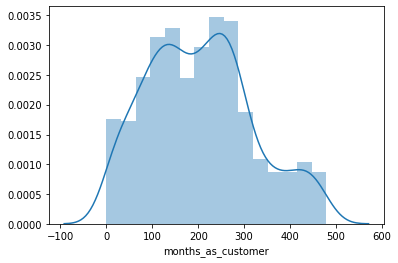

In [24]:
sns.distplot(data_raw['months_as_customer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506cd82b48>,
 'caps': [<matplotlib.lines.Line2D at 0x2506cd82ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506cd82408>],
 'medians': [<matplotlib.lines.Line2D at 0x2506cd87a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506cd87f48>],
 'means': []}

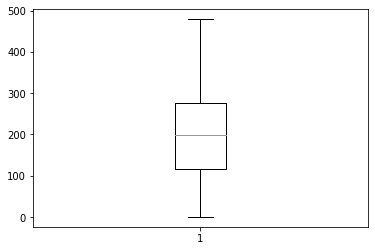

In [25]:
plt.boxplot(data_raw['months_as_customer'])

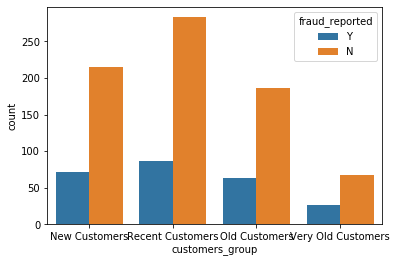

In [30]:
#Binning Feature into Logical Categries
bins = [0, 126, 251, 376, 500]
labels = ['New Customers', 'Recent Customers', 'Old Customers', 'Very Old Customers']
data_raw['customers_group'] = pd.cut(data_raw['months_as_customer'], bins, labels=labels)

#Countplot for the variable
sns.countplot(x='customers_group', hue='fraud_reported', data = data_raw)

## 2.2. Feature: age

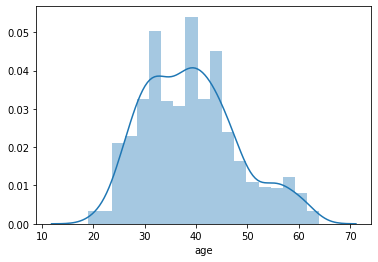

In [28]:
#Distribution PLot for the variable
sns.distplot(data_raw['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506d03f508>,
 'caps': [<matplotlib.lines.Line2D at 0x2506d03ffc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506d039d48>],
 'medians': [<matplotlib.lines.Line2D at 0x2506d046b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506d046f08>],
 'means': []}

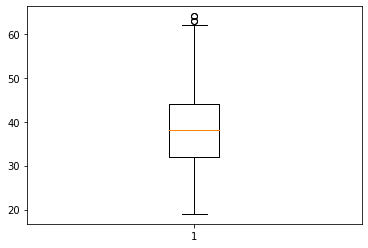

In [29]:
#Boxplot for the variable
plt.boxplot(data_raw['age'])

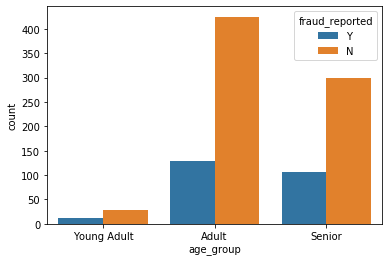

In [31]:
#Binning Feature into Logical Categories
bins = [18, 25, 40, 65]
labels = ['Young Adult', 'Adult', 'Senior']
data_raw['age_group'] = pd.cut(data_raw['age'], bins, labels=labels)

#Countplot for the feature
sns.countplot(x='age_group', hue='fraud_reported', data=data_raw)

## 2.3. Feature: policy_number

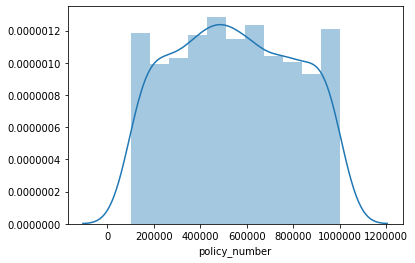

In [33]:
#Distribution Plot for the Feature
sns.distplot(data_raw['policy_number'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2506d2175c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2506d217e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2506d214bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2506d21ae08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2506d21fc88>],
 'means': []}

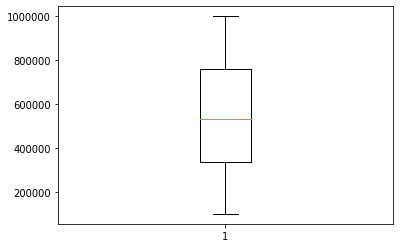

In [34]:
#Boxplot for the Feature
plt.boxplot(data_raw['policy_number'])

## 2.5. Feature: policy_state

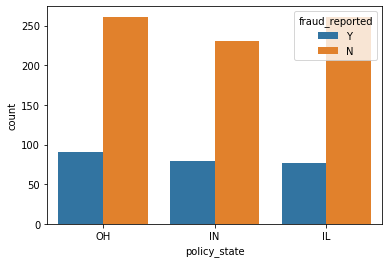

In [36]:
#Countplot for the Feature against Target
sns.countplot(x='policy_state', hue='fraud_reported', data=data_raw)

## 2.6. Feature: policy_csl

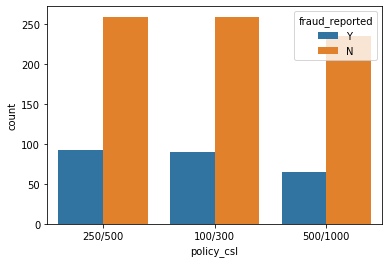

In [38]:
#Countplot for the Feature against Target
sns.countplot(x='policy_csl', hue='fraud_reported', data=data_raw)

## 2.8. Feature: policy_annual_premium	

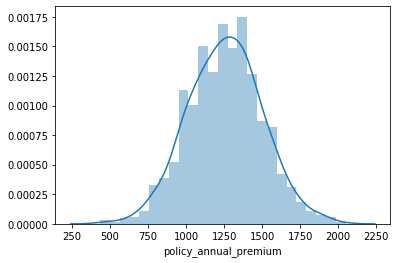

In [41]:
#Distribution PLot for the Feature
sns.distplot(data_raw['policy_annual_premium'])

{'whiskers': [<matplotlib.lines.Line2D at 0x250706b6f08>,
 'caps': [<matplotlib.lines.Line2D at 0x250706bcac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x250706b67c8>],
 'medians': [<matplotlib.lines.Line2D at 0x250706c0fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x250706c58c8>],
 'means': []}

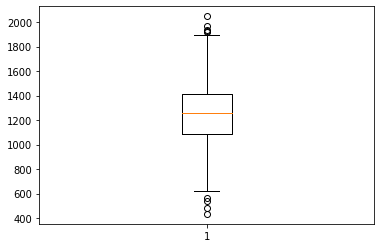

In [44]:
#Boxplot for the Feature
plt.boxplot(data_raw['policy_annual_premium'])

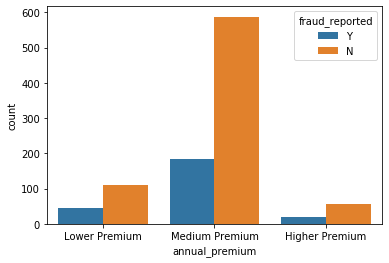

In [43]:
#Binning Feature into Logical Categories
bins = [400, 1001, 1601, 2100]
labels = ['Lower Premium', 'Medium Premium', 'Higher Premium']
data_raw['annual_premium'] = pd.cut(data_raw['policy_annual_premium'], bins, labels=labels)

#Countplot for the Feature against Target
sns.countplot(x='annual_premium', hue='fraud_reported', data=data_raw)

## 2.10. Feature: insured_zip

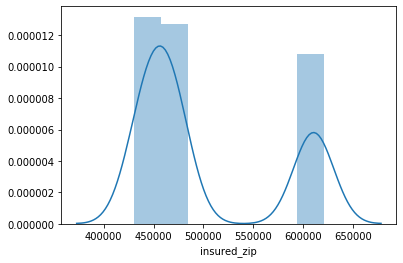

In [55]:
sns.distplot(data_raw['insured_zip'])

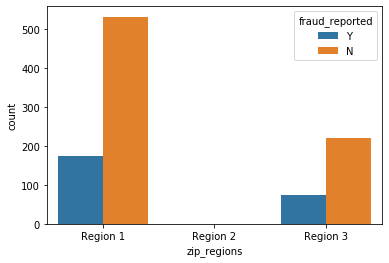

In [56]:
#Binning Feature into Logical Categories
bins = [400000, 500000, 600000, 700000]
labels = ['Region 1', 'Region 2', 'Region 3']
data_raw['zip_regions'] = pd.cut(data_raw['insured_zip'], bins, labels=labels)

#Countplot for the Feature against Target
sns.countplot(x='zip_regions', hue='fraud_reported', data=data_raw)

## 2.11. Feature: insured_sex

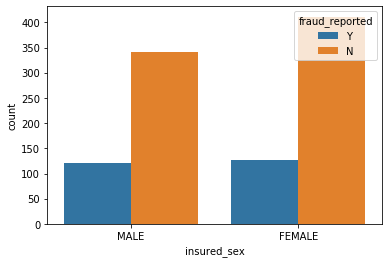

In [61]:
#Countplot for the Feature against Target
sns.countplot(x='insured_sex', hue='fraud_reported', data=data_raw)

## 2.12. Feature: insured_education_level

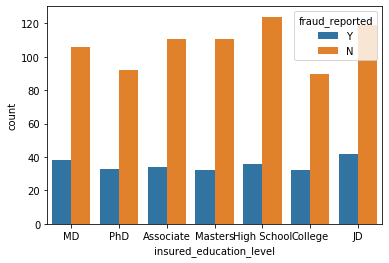

In [64]:
#Countplot for the Feature against Target
sns.countplot(x='insured_education_level', hue='fraud_reported', data=data_raw)

## 2.13. Feature: insured_occupation

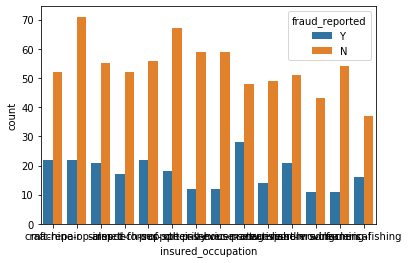

In [66]:
#Countplot for the Feature against Target
sns.countplot(x='insured_occupation', hue='fraud_reported', data=data_raw)

In [69]:
data_raw['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

## 2.14. Feature: insured_hobbies

In [71]:
data_raw['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

## 2.15. Feature: insured_relationship

In [73]:
data_raw['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

## 2.16. Feature: capital-gains

In [78]:
data_raw['capital-gains'].describe()

count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64

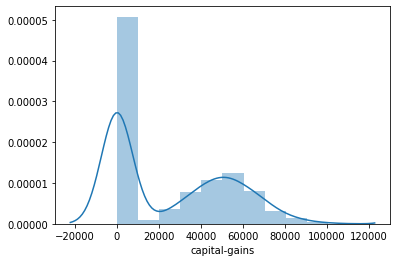

In [76]:
sns.distplot(data_raw['capital-gains'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25071c84648>,
 'caps': [<matplotlib.lines.Line2D at 0x25071c84ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25071c7fc88>],
 'medians': [<matplotlib.lines.Line2D at 0x25071c88e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25071c8ccc8>],
 'means': []}

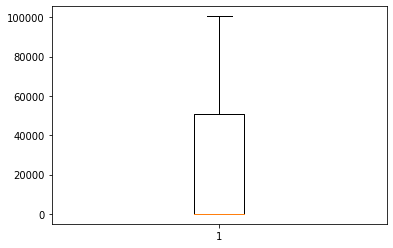

In [77]:
plt.boxplot(data_raw['capital-gains'])

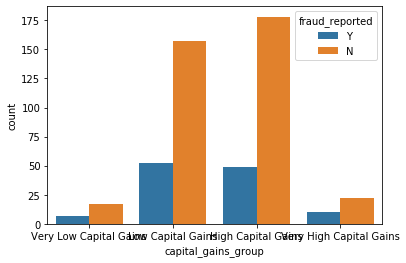

In [79]:
bins = [0, 25001, 50001, 75001, 110000]
labels = ['Very Low Capital Gains', 'Low Capital Gains', 'High Capital Gains', 'Very High Capital Gains']
data_raw['capital_gains_group'] = pd.cut(data_raw['capital-gains'], bins, labels=labels) 

sns.countplot(x='capital_gains_group', hue='fraud_reported', data=data_raw)

## 2.17. Feature: capital-loss

In [81]:
data_raw['capital-loss'].describe()

count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64

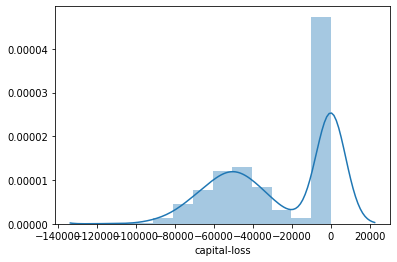

In [80]:
sns.distplot(data_raw['capital-loss'])

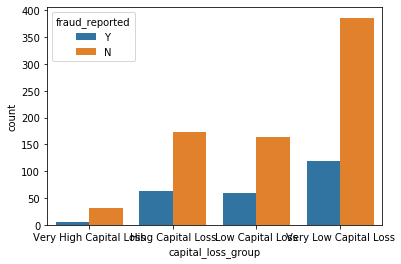

In [82]:
bins = [-120000, -75000, -50000, -25000, 0]
labels = ['Very High Capital Loss', 'Hihg Capital Loss', 'Low Capital Loss', 'Very Low Capital Loss']
data_raw['capital_loss_group'] = pd.cut(data_raw['capital-loss'], bins, labels=labels) 

sns.countplot(x='capital_loss_group', hue='fraud_reported', data=data_raw)

## 2.19. Feature: incident_type

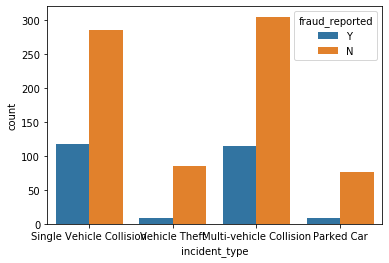

In [89]:
sns.countplot(x='incident_type', hue='fraud_reported', data=data_raw)

## 2.20. Feature: collision_type

In [99]:
data_raw['collision_type'] = data_raw.loc[0:, 'collision_type'].replace('?', 'Unknown')

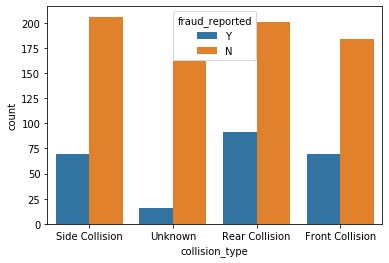

In [100]:
sns.countplot(x='collision_type', hue='fraud_reported', data=data_raw)

## 2.21. Feature: incident_severity

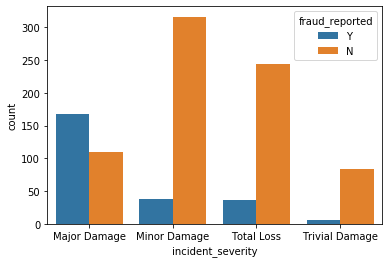

In [103]:
sns.countplot(x='incident_severity', hue='fraud_reported', data=data_raw)

## 2.22. Feature: authorities_contacted

In [140]:
data_raw['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

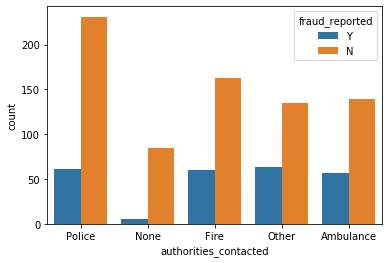

In [141]:
sns.countplot(x='authorities_contacted', hue='fraud_reported', data=data_raw)

## 2.24. Feature: incident_city

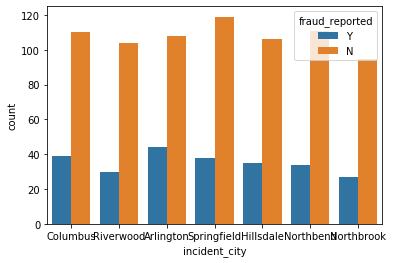

In [105]:
sns.countplot(x='incident_city', hue='fraud_reported', data=data_raw)

## 2.25. Feature: incident_location

In [108]:
data_raw['incident_location'].describe()

count             1000
unique            1000
top       2757 4th Hwy
freq                 1
Name: incident_location, dtype: object

## 2.26. Feature: incident_hour_of_the_day

In [112]:
data_raw['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

## 2.27. Feature: number_of_vehicles_involved

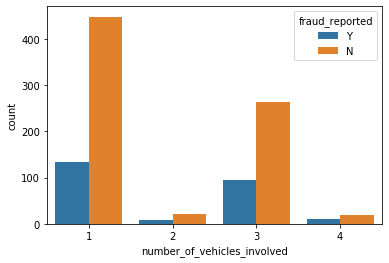

In [118]:
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=data_raw)

## 2.28. Feature: property_damage

In [120]:
data_raw['property_damage'].describe()

count     1000
unique       3
top          ?
freq       360
Name: property_damage, dtype: object

In [121]:
data_raw['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [122]:
data_raw['property_damage'] = data_raw.loc[0:, 'property_damage'].replace('?', 'Unknown')

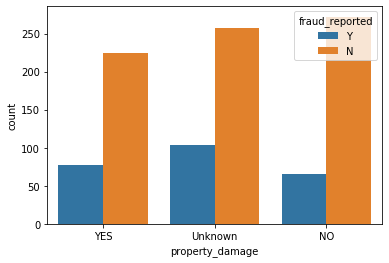

In [123]:
sns.countplot(x='property_damage', hue='fraud_reported', data=data_raw)

## 2.29. Feature: bodily_injuries

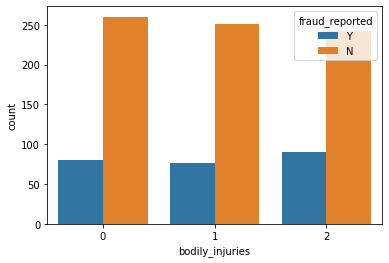

In [127]:
sns.countplot(x='bodily_injuries', hue='fraud_reported', data=data_raw)

## 2.30. Feature: witnesses

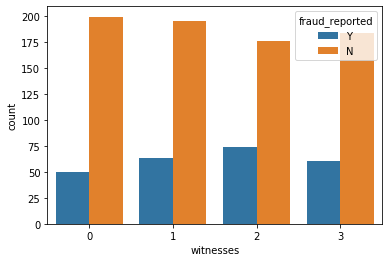

In [133]:
sns.countplot(x='witnesses', hue='fraud_reported', data=data_raw)

## 2.31. Feature: police_report_available

In [136]:
data_raw['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

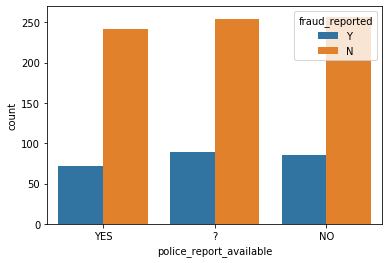

In [137]:
sns.countplot(x='police_report_available', hue='fraud_reported', data=data_raw)

## 2.32. Feature: total_claim_amount

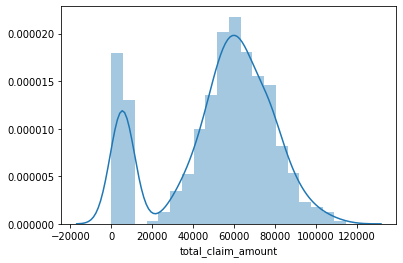

In [144]:
sns.distplot(data_raw['total_claim_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x250735f7f48>,
 'caps': [<matplotlib.lines.Line2D at 0x250735fcf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x250735f7748>],
 'medians': [<matplotlib.lines.Line2D at 0x25073600f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25073600fc8>],
 'means': []}

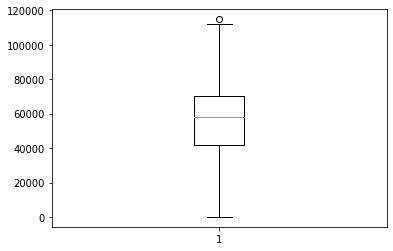

In [145]:
plt.boxplot(data_raw['total_claim_amount'])

In [146]:
data_raw['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

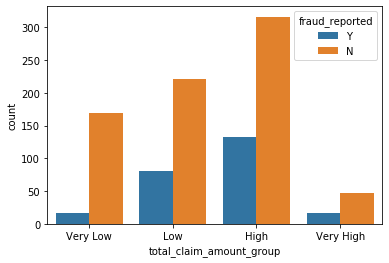

In [149]:
bins = [0, 28751, 57501, 86251, 115000]
labels = ['Very Low', 'Low', 'High', 'Very High']
data_raw['total_claim_amount_group'] = pd.cut(data_raw['total_claim_amount'], bins, labels=labels)

sns.countplot(x='total_claim_amount_group', hue='fraud_reported', data=data_raw)

## 2.33. Feature: injury_claim

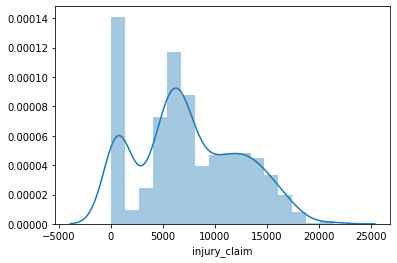

In [154]:
sns.distplot(data_raw['injury_claim'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25073790bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25073790d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x25073790488>],
 'medians': [<matplotlib.lines.Line2D at 0x25073796d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25073796dc8>],
 'means': []}

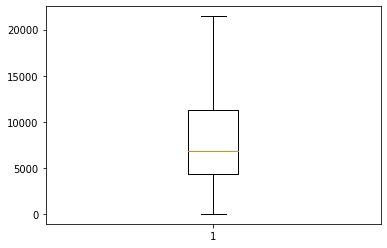

In [155]:
plt.boxplot(data_raw['injury_claim'])

In [156]:
data_raw['injury_claim'].describe()

count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
25%       4295.000000
50%       6775.000000
75%      11305.000000
max      21450.000000
Name: injury_claim, dtype: float64

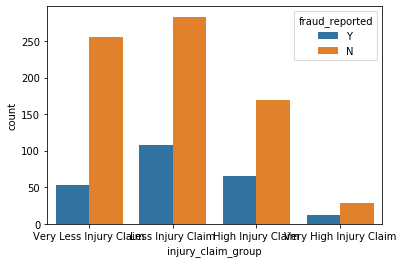

In [157]:
bins = [0, 5376, 10751, 16126, 21500]
labels = ['Very Less Injury Claim', 'Less Injury Claim', 'High Injury Claim', 'Very High Injury Claim']
data_raw['injury_claim_group'] = pd.cut(data_raw['injury_claim'], bins, labels=labels)

sns.countplot(x='injury_claim_group', hue='fraud_reported', data=data_raw)

## 2.34. Feature: property_claim

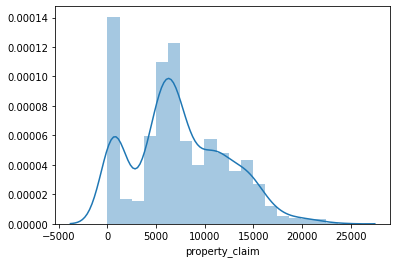

In [164]:
sns.distplot(data_raw['property_claim'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25073a0af48>,
 'caps': [<matplotlib.lines.Line2D at 0x25073a10b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x25073a0a908>],
 'medians': [<matplotlib.lines.Line2D at 0x25073a15b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25073a19988>],
 'means': []}

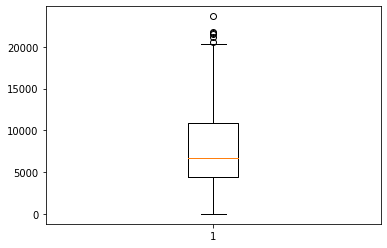

In [165]:
plt.boxplot(data_raw['property_claim'])

In [166]:
data_raw['property_claim'].describe()

count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
25%       4445.000000
50%       6750.000000
75%      10885.000000
max      23670.000000
Name: property_claim, dtype: float64

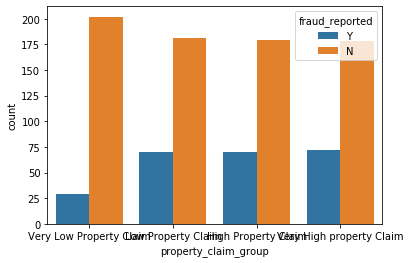

In [169]:
bins = [0, 4445, 6750, 10885, 23670]
labels = ['Very Low Property Claim', 'Low Property Claim', 'High Property Claim', 'Very High property Claim']
data_raw['property_claim_group'] = pd.cut(data_raw['property_claim'], bins, labels=labels)

sns.countplot(x='property_claim_group', hue='fraud_reported', data=data_raw)

## 2.35. Feature: vehicle_claim

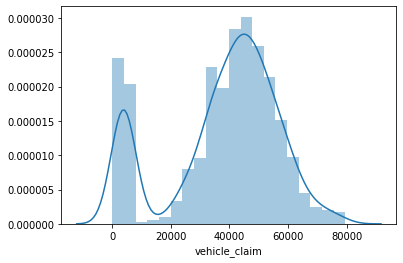

In [172]:
sns.distplot(data_raw['vehicle_claim'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25073c7cbc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25073c80b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x25073c7c208>],
 'medians': [<matplotlib.lines.Line2D at 0x25073c86b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25073c86c08>],
 'means': []}

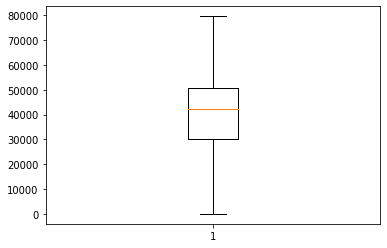

In [173]:
plt.boxplot(data_raw['vehicle_claim'])

In [171]:
data_raw['vehicle_claim'].describe()

count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
25%      30292.500000
50%      42100.000000
75%      50822.500000
max      79560.000000
Name: vehicle_claim, dtype: float64

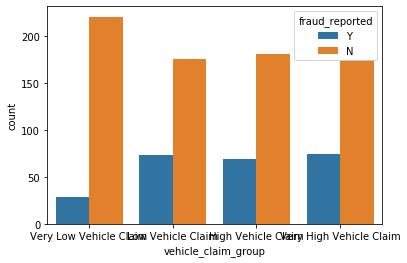

In [174]:
bins = [0, 30292, 42100, 50822, 79560]
labels = ['Very Low Vehicle Claim', 'Low Vehicle Claim', 'High Vehicle Claim', 'Very High Vehicle Claim']
data_raw['vehicle_claim_group'] = pd.cut(data_raw['vehicle_claim'], bins, labels=labels)

sns.countplot(x='vehicle_claim_group', hue='fraud_reported', data=data_raw)

## 2.36. Feature: auto_make

In [175]:
data_raw['auto_make'].describe()

count       1000
unique        14
top       Suburu
freq          80
Name: auto_make, dtype: object

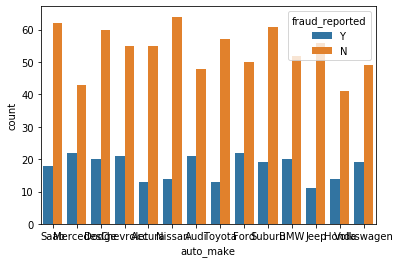

In [176]:
sns.countplot(x='auto_make', hue='fraud_reported', data=data_raw)

## 2.37. Feature: auto_model

In [177]:
data_raw['auto_model'].describe()

count     1000
unique      39
top        RAM
freq        43
Name: auto_model, dtype: object

## 2.38. Feature: auto_year

In [181]:
data_raw['auto_year'].describe()

count    1000.000000
mean     2005.103000
std         6.015861
min      1995.000000
25%      2000.000000
50%      2005.000000
75%      2010.000000
max      2015.000000
Name: auto_year, dtype: float64

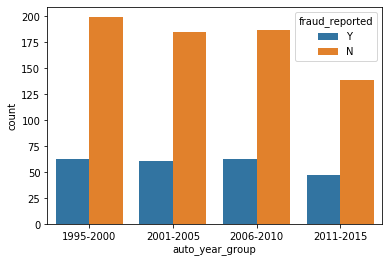

In [182]:
bins = [1995, 2001, 2006, 2011, 2016]
labels = ['1995-2000', '2001-2005', '2006-2010', '2011-2015']
data_raw['auto_year_group'] = pd.cut(data_raw['auto_year'], bins, labels=labels)

sns.countplot(x='auto_year_group', hue='fraud_reported', data=data_raw)